In [32]:
%run lib.py

In [1]:
def ExpTruncatedCDF(x, alpha): 
    return (1 - exp(-alpha * x)) / (1 - exp(-alpha))

def ExpTruncatedPDF(x, alpha): 
    return alpha * exp(-alpha * x) / (1 - exp(-alpha))

In [27]:
def PlotBuilderFour(gamma_s, gamma_b, function, parameters_list, linestyles, colors, labels, constant_revenue, figname, legend_hor): 
    fig = plt.figure(figsize = (20, 9))

    gs = gridspec.GridSpec(4, 2, hspace = 0.5, wspace = 0.1, height_ratios=[1.0, 1.0, 0.5, 0.5]) 
    gammas_s = np.arange(gamma_b, 1.0, 0.005)
    gammas_b = np.arange(0.01, gamma_s + 0.0001, 0.005)
    
    Revenues_s = []
    Params_s = []
    for s in gammas_s: 
        solution_dict = function(s, gamma_b)
        Revenues_s.append([solution_dict['revenue'], constant_revenue(s)])
        Params_s.append([solution_dict[param] for param in parameters_list])
    Revenues_s = np.array(Revenues_s).transpose()
    Params_s = np.array(Params_s).transpose()
    
    Revenues_b = []
    Params_b = []
    for b in gammas_b: 
        solution_dict = function(gamma_s, b)
        Revenues_b.append([solution_dict['revenue'], constant_revenue(gamma_s)])
        Params_b.append([solution_dict[param] for param in parameters_list])
    Revenues_b = np.array(Revenues_b).transpose()
    Params_b = np.array(Params_b).transpose()
    
    ax1 = plt.Subplot(fig, gs[0:2, 1])
    for (row, param, style, color, label) in zip(Params_s, parameters_list, linestyles, colors, labels): 
        line, = ax1.plot(gammas_s, row, linestyle = style, color = color, label = label)
        label = param
    plt.setp(ax1.get_xticklabels(), visible=False)
    ax1.legend(loc = (legend_hor, -0.1), ncol = 7)
    ax1.set_title('(b) gamma_b = 0.2')
    fig.add_subplot(ax1)
    
    ax2 = plt.Subplot(fig, gs[0:2, 0])
    for (row, param, style, color) in zip(Params_b, parameters_list, linestyles, colors): 
        line, = ax2.plot(gammas_b, row, linestyle = style, color = color)
    ax2.set_ylabel('Optimal algorithm prices')
    ax2.set_title('(a) gamma_s = 0.8')
    plt.setp(ax2.get_xticklabels(), visible=False)
    fig.add_subplot(ax2)
    
    ax4 = plt.Subplot(fig, gs[2:4, 1], sharex = ax1)
    line_1, = ax4.plot(gammas_s, [opt / const for (opt, const) in zip(Revenues_s[0], Revenues_s[1])])
    line_2, = ax4.plot(gammas_s, [1.0 for const in Revenues_s[1]], color = 'gray', linestyle = '--')
    ax4.set_xlabel('gamma_s')
    fig.add_subplot(ax4)
    
    #ax5 = plt.Subplot(fig, gs[2, 1])
    #line_1, = ax5.plot(gammas_b, Revenues_b[0])
    #line_2, = ax5.plot(gammas_b, Revenues_b[1])
    #fig.add_subplot(ax5)
    
    ax6 = plt.Subplot(fig, gs[2:4, 0], sharex = ax2)
    line_1, = ax6.plot(gammas_b, [opt / const for (opt, const) in zip(Revenues_b[0], Revenues_b[1])], label = 'Optimal')
    line_2, = ax6.plot(gammas_b, [1.0 for const in Revenues_b[1]], label = 'Baseline', color = 'gray', linestyle = '--')
    ax6.legend(loc = (0.6, 0.75))
    ax6.set_ylabel('Relative expected strategic revenue')
    ax6.set_xlabel('gamma_b')
    fig.add_subplot(ax6)

    
    fig.savefig(figname, bbox_inches = 'tight', format='eps')
    plt.show()
    

def PlotBuilderFive(gamma_s, gamma_b, function, parameters_list, linestyles, colors, labels, constant_revenue, figname, legend_hor): 
    fig = plt.figure(figsize = (20, 10))

    gs = gridspec.GridSpec(2, 2, hspace = 0.2, wspace = 0.1, height_ratios=[1.0, 0.5]) 
    gammas_s = np.arange(gamma_b, 0.9, 0.005)
    gammas_b = np.arange(0.01, gamma_s + 0.0001, 0.005)
    
    Revenues_s = []
    Params_s = []
    for s in gammas_s: 
        solution2 = function(2, s, gamma_b)
        solution3 = function(3, s, gamma_b)
        solution4 = function(4, s, gamma_b)
        solution5 = function(5, s, gamma_b)
        solution6 = function(6, s, gamma_b)
        Revenues_s.append([constant_revenue(s), solution2['revenue'], solution3['revenue'],
                           solution4['revenue'], solution5['revenue'], solution6['revenue']])
        Params_s.append([solution4[param] for param in parameters_list])
    Revenues_s = np.array(Revenues_s).transpose()
    Params_s = np.array(Params_s).transpose()
    
    Revenues_b = []
    Params_b = []
    for b in gammas_b: 
        solution2 = function(2, gamma_s, b)
        solution3 = function(3, gamma_s, b)
        solution4 = function(4, gamma_s, b)
        solution5 = function(5, gamma_s, b)
        solution6 = function(6, gamma_s, b)
        Revenues_b.append([constant_revenue(gamma_s), solution2['revenue'], solution3['revenue'],
                           solution4['revenue'], solution5['revenue'], solution6['revenue']])
        Params_b.append([solution4[param] for param in parameters_list])
    Revenues_b = np.array(Revenues_b).transpose()
    Params_b = np.array(Params_b).transpose()
    
    
    ax1 = plt.Subplot(fig, gs[0:1, 1])
    for (row, param, style, color, label) in zip(Params_s, parameters_list, linestyles, colors, labels): 
        line, = ax1.plot(gammas_s, row, linestyle = style, color = color, label = label)
        label = param
    plt.setp(ax1.get_xticklabels(), visible=False)
    ax1.legend(loc = (legend_hor, -0.1), ncol = 15)
    ax1.set_title('(b) gamma_b = 0.2')
    fig.add_subplot(ax1)
    
    ax2 = plt.Subplot(fig, gs[0:1, 0])
    for (row, param, style, color) in zip(Params_b, parameters_list, linestyles, colors): 
        line, = ax2.plot(gammas_b, row, linestyle = style, color = color)
    ax2.set_ylabel('Optimal algorithm prices')
    ax2.set_title('(a) gamma_s = 0.8')
    plt.setp(ax2.get_xticklabels(), visible=False)
    fig.add_subplot(ax2)
    
    ax4 = plt.Subplot(fig, gs[1:2, 1], sharex = ax1)
    line_1, = ax4.plot(gammas_s, [1.0 for const in Revenues_s[1]], color = 'gray', linestyle = '--', label = 'Baseline')
    line_2, = ax4.plot(gammas_s, [opt / const for (opt, const) in zip(Revenues_s[1], Revenues_s[0])], label = '2-step algorithm')
    line_3, = ax4.plot(gammas_s, [opt / const for (opt, const) in zip(Revenues_s[2], Revenues_s[0])], label = '3-step algorithm')
    line_4, = ax4.plot(gammas_s, [opt / const for (opt, const) in zip(Revenues_s[3], Revenues_s[0])], label = '4-step algorithm')
    line_5, = ax4.plot(gammas_s, [opt / const for (opt, const) in zip(Revenues_s[4], Revenues_s[0])], label = '5-step algorithm')
    line_6, = ax4.plot(gammas_s, [opt / const for (opt, const) in zip(Revenues_s[5], Revenues_s[0])], label = '6-step algorithm')
    ax4.legend(loc = (0.05, 0.3))
    ax4.set_xlabel('gamma_s')
    fig.add_subplot(ax4)
    
    ax6 = plt.Subplot(fig, gs[1:2, 0], sharex = ax2)
    line_1, = ax6.plot(gammas_b, [1.0 for const in Revenues_b[1]], color = 'gray', linestyle = '--')
    line_2, = ax6.plot(gammas_b, [opt / const for (opt, const) in zip(Revenues_b[1], Revenues_b[0])])
    line_3, = ax6.plot(gammas_b, [opt / const for (opt, const) in zip(Revenues_b[2], Revenues_b[0])])
    line_4, = ax6.plot(gammas_b, [opt / const for (opt, const) in zip(Revenues_b[3], Revenues_b[0])])
    line_5, = ax6.plot(gammas_b, [opt / const for (opt, const) in zip(Revenues_b[4], Revenues_b[0])])
    line_6, = ax6.plot(gammas_b, [opt / const for (opt, const) in zip(Revenues_b[5], Revenues_b[0])])
    ax6.set_ylabel('Relative expected strategic revenue')
    ax6.set_xlabel('gamma_b')
    fig.add_subplot(ax6)

    
    fig.savefig(figname, bbox_inches = 'tight', format='eps')
    plt.show()   

## Figure C.1 from Appendix

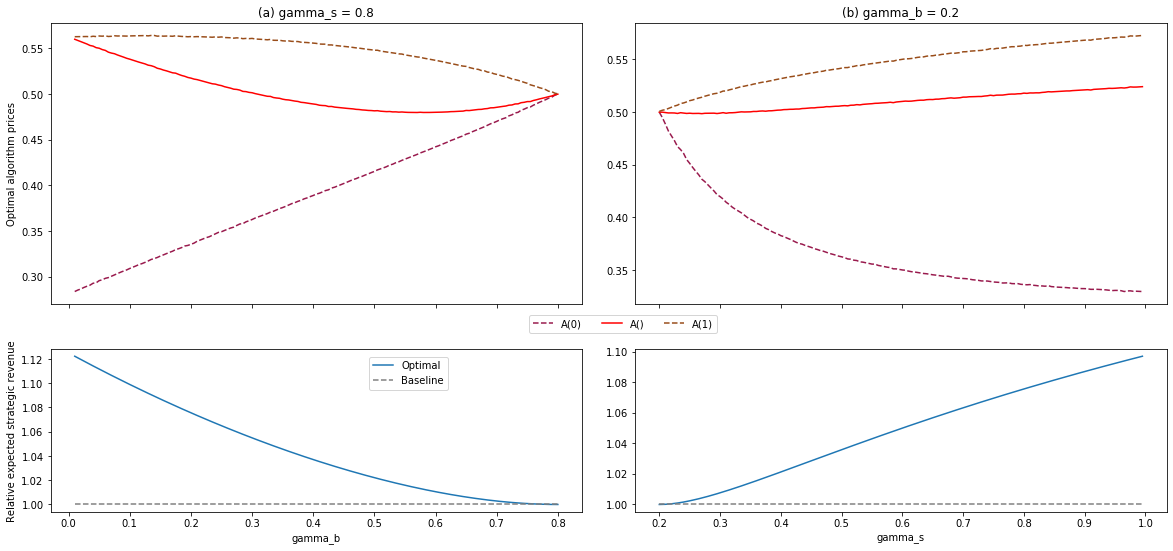

In [22]:
solution = lambda s, b : GlobalSolver(2, lambda x : x, lambda x : 1.0, s, b, False)
constant_revenue_2 = lambda s : (1 + s) * 0.25
parameters_list = ['p_0', 'p_', 'p_1']
labels = ['A(0)', 'A()', 'A(1)']
linestyles = ['--', '-', '--']
colors = [(0.6, 0.1, 0.3), 'red', (0.6, 0.3, 0.1)]
PlotBuilderFour(0.8, 0.2, solution, parameters_list, linestyles, colors, labels, constant_revenue_2, 'T2Uniform.eps', -0.2)

## Figure C.2 from Appendix

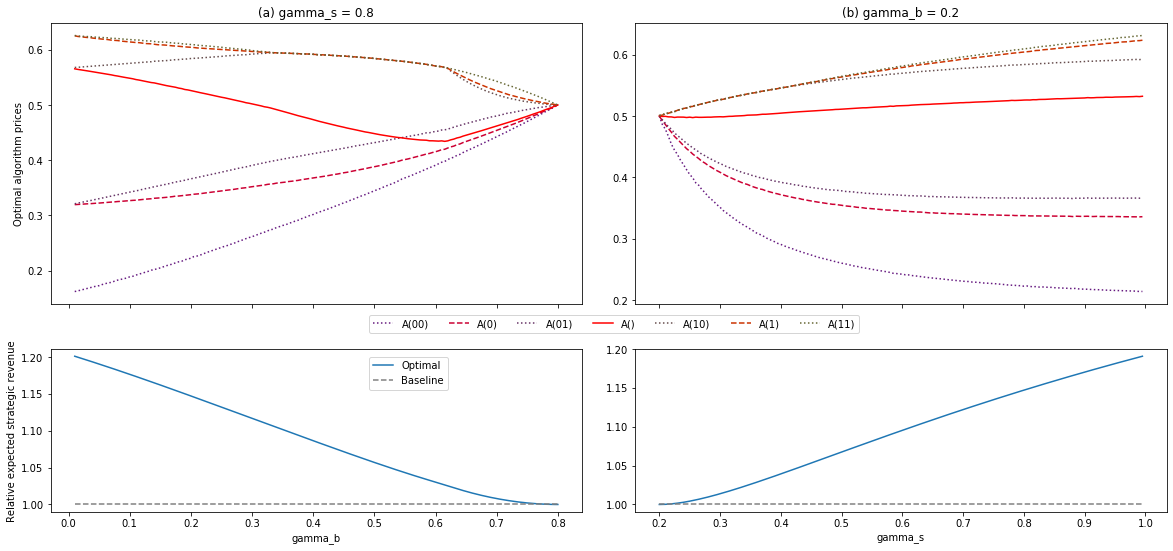

In [23]:
solution = lambda s, b : GlobalSolver(3, lambda x : x, lambda x : 1.0, s, b, False)
constant_revenue_3 = lambda s : (1 + s + s**2) * 0.25
parameters_list = ['p_00', 'p_0', 'p_01','p_', 'p_10', 'p_1', 'p_11']
labels = ['A(00)', 'A(0)', 'A(01)', 'A()', 'A(10)', 'A(1)', 'A(11)']
linestyles = [':', '--', ':', '-', ':', '--', ':']
colors = [(0.4, 0.1, 0.5), (0.8, 0.0, 0.2), (0.4, 0.2, 0.4), 'red', (0.4, 0.3, 0.3), (0.8, 0.2, 0.0), (0.4, 0.4, 0.2)]
PlotBuilderFour(0.8, 0.2, solution, parameters_list, linestyles, colors, labels, constant_revenue_3, 'T3Uniform.eps', -0.5)

## Figure C.3 from Appendix

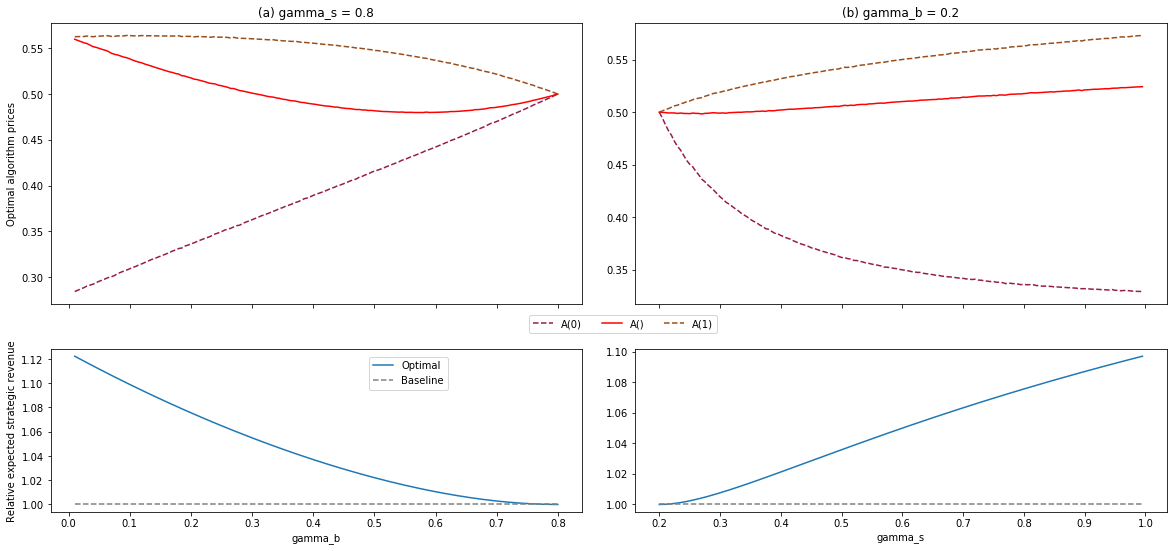

In [21]:
solution = lambda s, b : GlobalSolver(2, lambda x : x, lambda x : 1.0, s, b, False)
constant_revenue_2 = lambda s : (1 + s) * 0.25
parameters_list = ['p_0', 'p_', 'p_1']
labels = ['A(0)', 'A()', 'A(1)']
linestyles = ['--', '-', '--']
colors = [(0.6, 0.1, 0.3), 'red', (0.6, 0.3, 0.1)]
PlotBuilderFour(0.8, 0.2, solution, parameters_list, linestyles, colors, labels, constant_revenue_2, 'T2Uniform.eps', -0.2)

## Figure C.4 from Appendix

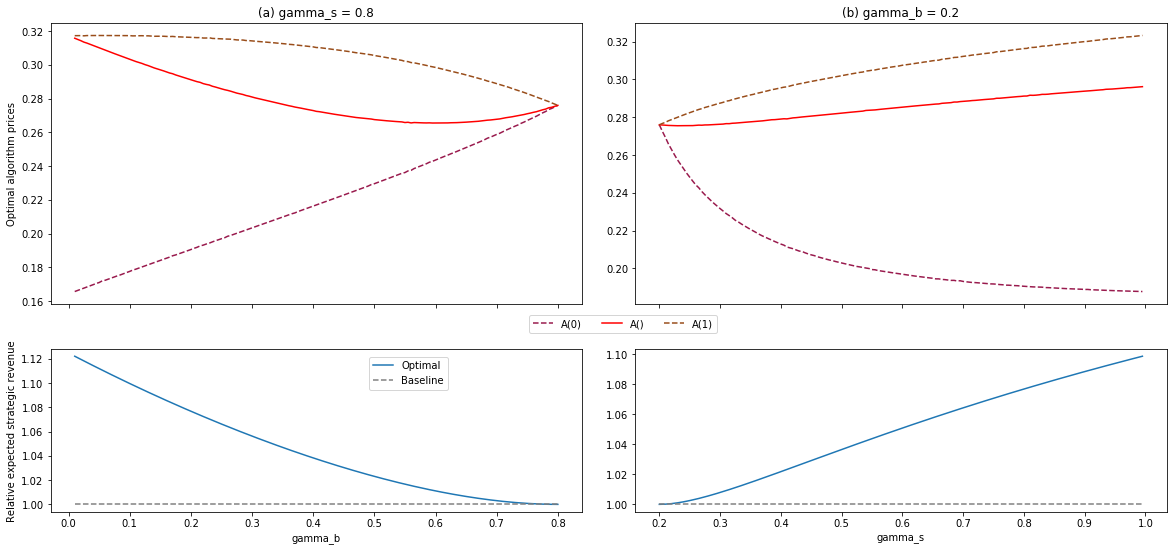

In [24]:
solution = lambda s, b : GlobalSolverMaxN(2, lambda x : beta.cdf(x, 2, 4), lambda x : beta.pdf(x, 2, 4), s, b, False, 3)
constant_revenue_2 = lambda s : (1 + s) * 0.15954033363758743
parameters_list = ['p_0', 'p_', 'p_1']
labels = ['A(0)', 'A()', 'A(1)']
linestyles = ['--', '-', '--']
colors = [(0.6, 0.1, 0.3), 'red', (0.6, 0.3, 0.1)]
PlotBuilderFour(0.8, 0.2, solution, parameters_list, linestyles, colors, labels, constant_revenue_2, 'T2Beta24.eps', -0.2)

## Figure C.5 from Appendix

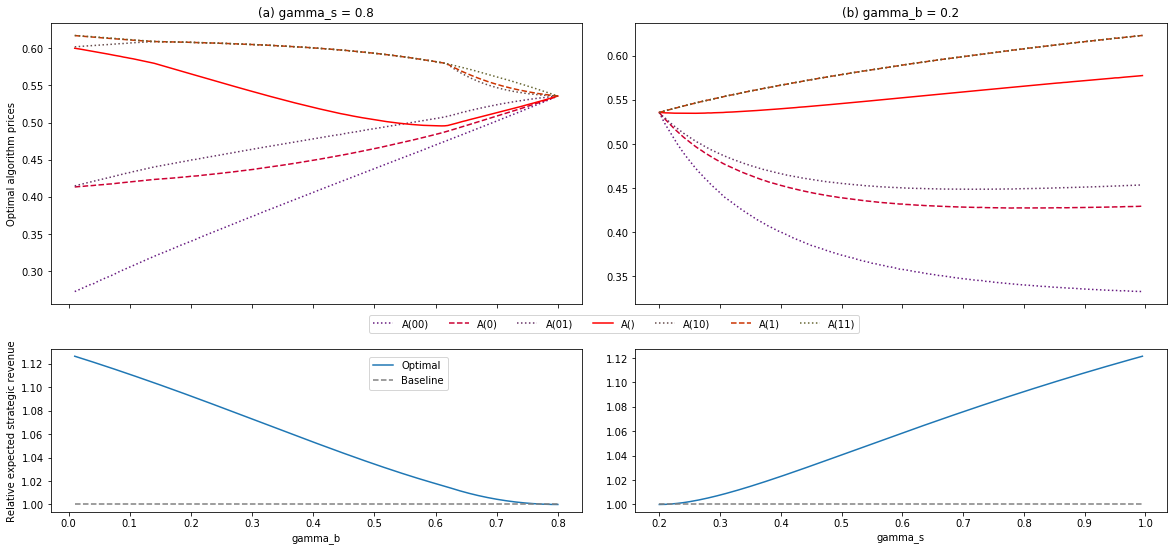

In [10]:
solution = lambda s, b : GlobalSolverMaxN(3, lambda x : beta.cdf(x, 4, 2), lambda x : beta.pdf(x, 4, 2), s, b, False, 3)
constant_revenue_3 = lambda s : (1 + s + s**2) * 0.40964825181031311
parameters_list = ['p_00', 'p_0', 'p_01','p_', 'p_10', 'p_1', 'p_11']
labels = ['A(00)', 'A(0)', 'A(01)', 'A()', 'A(10)', 'A(1)', 'A(11)']
linestyles = [':', '--', ':', '-', ':', '--', ':']
colors = [(0.4, 0.1, 0.5), (0.8, 0.0, 0.2), (0.4, 0.2, 0.4), 'red', (0.4, 0.3, 0.3), (0.8, 0.2, 0.0), (0.4, 0.4, 0.2)]
PlotBuilderFour(0.8, 0.2, solution, parameters_list, linestyles, colors, labels, constant_revenue_3, 'T3Beta42.eps', -0.5)

## Figure C.6 from Appendix

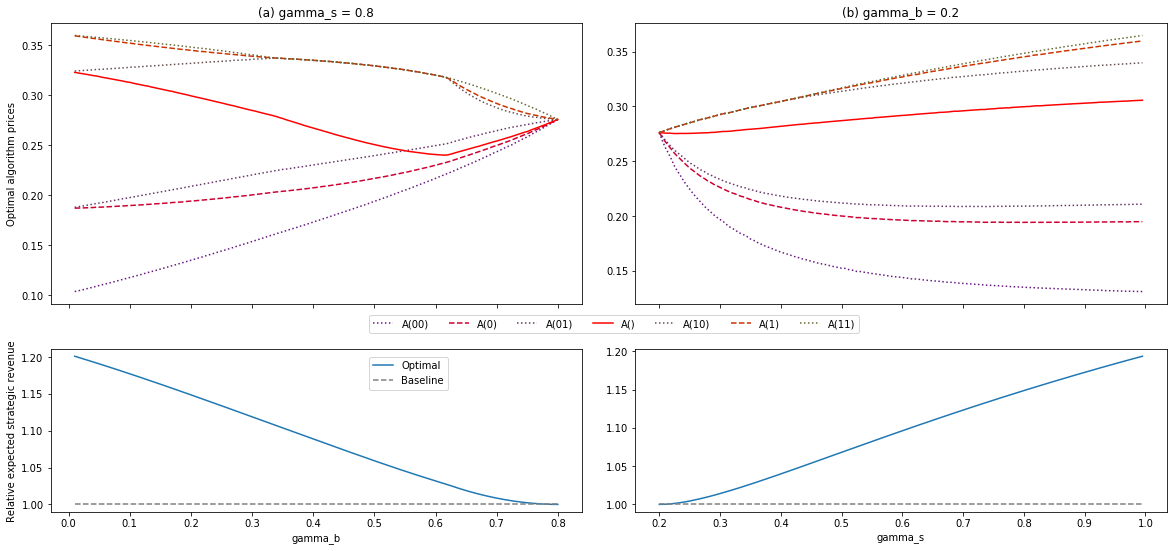

In [25]:
solution = lambda s, b : GlobalSolverMaxN(3, lambda x : beta.cdf(x, 2, 4), lambda x : beta.pdf(x, 2, 4), s, b, False, 3)
constant_revenue_3 = lambda s : (1 + s + s**2) * 0.15954033363758743
parameters_list = ['p_00', 'p_0', 'p_01','p_', 'p_10', 'p_1', 'p_11']
labels = ['A(00)', 'A(0)', 'A(01)', 'A()', 'A(10)', 'A(1)', 'A(11)']
linestyles = [':', '--', ':', '-', ':', '--', ':']
colors = [(0.4, 0.1, 0.5), (0.8, 0.0, 0.2), (0.4, 0.2, 0.4), 'red', (0.4, 0.3, 0.3), (0.8, 0.2, 0.0), (0.4, 0.4, 0.2)]
PlotBuilderFour(0.8, 0.2, solution, parameters_list, linestyles, colors, labels, constant_revenue_3, 'T3Beta24.eps', -0.5)

## Figure C.7 from Appendix

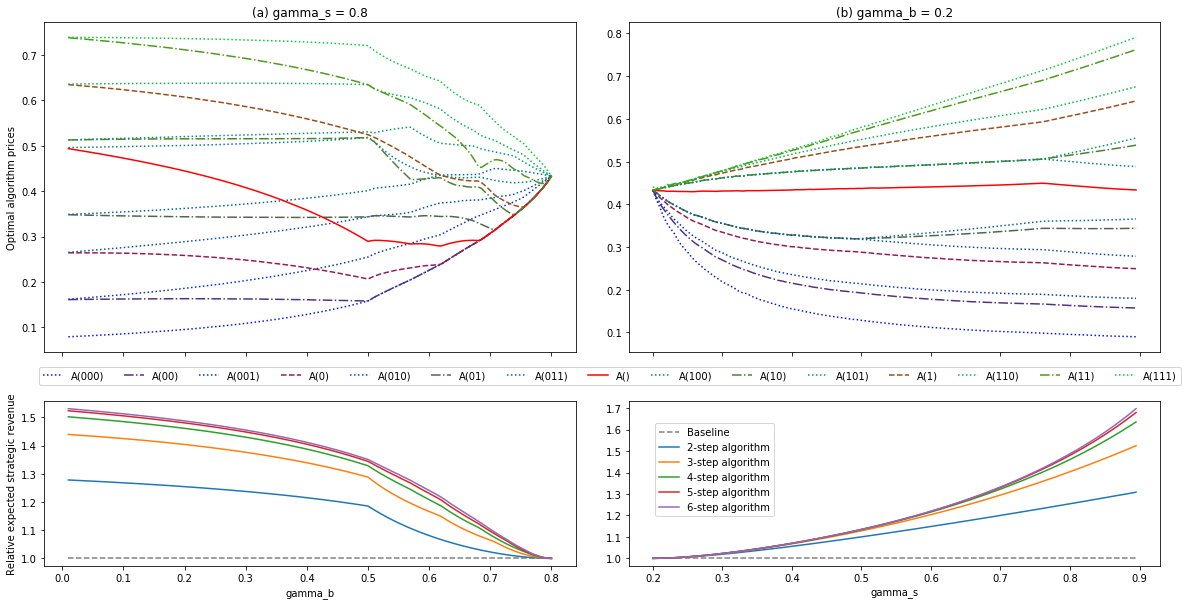

In [28]:
solution = lambda T, s, b: GlobalSolverMaxN(T, lambda x : ExpTruncatedCDF(x, 1.0), lambda x : ExpTruncatedPDF(x, 1.0), s, b, True, 3)
constant_revenue = lambda s : 0.19226538913641172/ (1 - s)
parameters_list = ['p_000', 'p_00', 'p_001', 'p_0', 'p_010', 'p_01', 'p_011', 'p_', 'p_100', 
                   'p_10', 'p_101', 'p_1', 'p_110', 'p_11', 'p_111']
labels = ['A(000)', 'A(00)', 'A(001)', 'A(0)', 'A(010)', 'A(01)', 'A(011)', 'A()', 'A(100)', 
                   'A(10)', 'A(101)', 'A(1)', 'A(110)', 'A(11)', 'A(111)']
linestyles = [':', '-.', ':', '--', ':', '-.', ':', '-', ':', '-.', ':', '--', ':', '-.', ':']
colors = [(0.0, 0.1, 0.9), (0.3, 0.2, 0.5) , (0.0, 0.2, 0.8), (0.6, 0.1, 0.3), (0.0, 0.3, 0.7), 
          (0.3, 0.4, 0.3) , (0.0, 0.4, 0.6), (1.0, 0.0, 0.0), (0.0, 0.5, 0.5), (0.3, 0.5, 0.2) , 
          (0.0, 0.6, 0.4), (0.6, 0.3, 0.1), (0.0, 0.7, 0.3), (0.3, 0.6, 0.1), (0.0, 0.8, 0.2)]
PlotBuilderFive(0.8, 0.2, solution, parameters_list, linestyles, colors, labels, constant_revenue, 'T4T6ExpInf.eps', -1.11)

## Figure C.8 from Appendix = Figure 1 from the main text

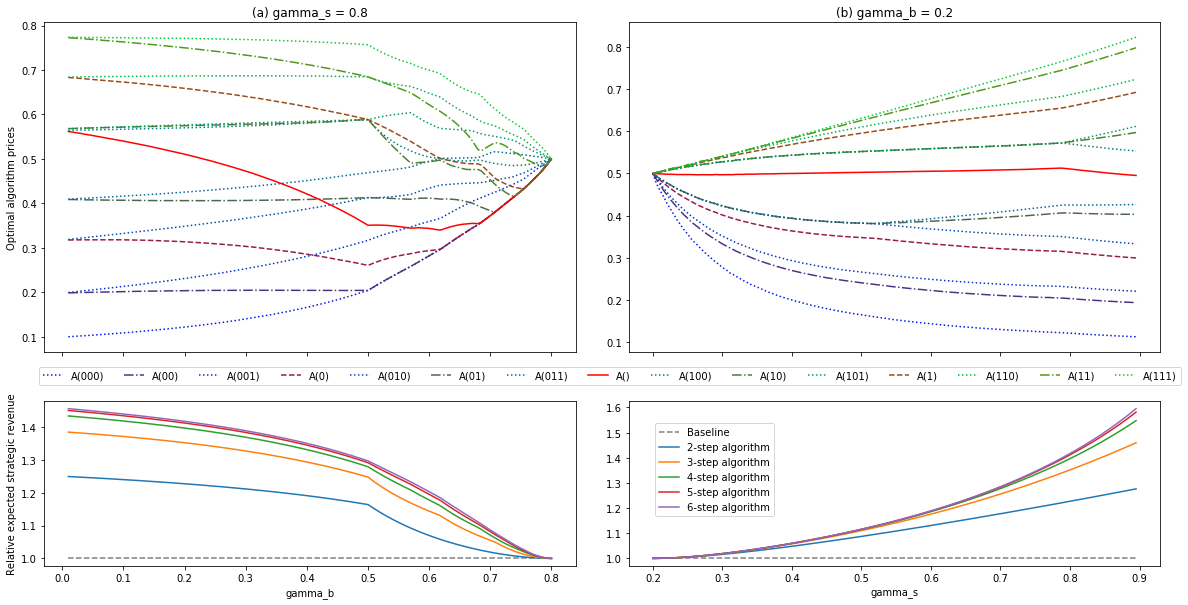

In [29]:
solution = lambda T, s, b: GlobalSolverMaxN(T, lambda x : x, lambda x : 1.0, s, b, True, 3)
constant_revenue = lambda s : 0.25 / (1 - s)
parameters_list = ['p_000', 'p_00', 'p_001', 'p_0', 'p_010', 'p_01', 'p_011', 'p_', 'p_100', 
                   'p_10', 'p_101', 'p_1', 'p_110', 'p_11', 'p_111']
labels = ['A(000)', 'A(00)', 'A(001)', 'A(0)', 'A(010)', 'A(01)', 'A(011)', 'A()', 'A(100)', 
                   'A(10)', 'A(101)', 'A(1)', 'A(110)', 'A(11)', 'A(111)']
linestyles = [':', '-.', ':', '--', ':', '-.', ':', '-', ':', '-.', ':', '--', ':', '-.', ':']
colors = [(0.0, 0.1, 0.9), (0.3, 0.2, 0.5) , (0.0, 0.2, 0.8), (0.6, 0.1, 0.3), (0.0, 0.3, 0.7), 
          (0.3, 0.4, 0.3) , (0.0, 0.4, 0.6), (1.0, 0.0, 0.0), (0.0, 0.5, 0.5), (0.3, 0.5, 0.2) , 
          (0.0, 0.6, 0.4), (0.6, 0.3, 0.1), (0.0, 0.7, 0.3), (0.3, 0.6, 0.1), (0.0, 0.8, 0.2)]
PlotBuilderFive(0.8, 0.2, solution, parameters_list, linestyles, colors, labels, constant_revenue, 'T4T6UniformInf.eps', -1.11)

## Figure 2 from the main text

In [30]:
def color_function(error): 
    if (error < 0): 
        return (0.0, 1.0, 0.0)
    elif (fabs(error) < 1.0e-5): 
        return (0, 0, 1.0)
    elif (error > 0): 
        return (1.0, 0.0, 0.0)


def PlotUncertainty(gamma_S, error_list, CDF, PDF, T): 
    b_true = np.arange(0.2, gamma_S + 0.001, 0.05)
    revenues = []
    
    for gamma_B in b_true: 
        opt_alg_with_trash = GlobalSolverMaxN(T, CDF, PDF, gamma_S, gamma_B, False, 3)
        revenue = opt_alg_with_trash['revenue']
        rev_list = [revenue]
        for error in error_list:
            if (gamma_B + error > gamma_S + 1.0e-10): 
                G_prime = (1.0 - (gamma_B + error) ** T) / (1.0 - (gamma_B + error))
                G_B = (1.0 - gamma_B ** T) / (1.0 - gamma_B)
                
                revenue_error = G_prime * 0.5 * (1.0 - G_prime / G_B * 0.5)
                
                rev_list.append(revenue_error)
            else : 
                opt_alg_with_trash = GlobalSolverMaxN(T, CDF, PDF, gamma_S, gamma_B + error, False, 3)
                for key in list(opt_alg_with_trash.keys()): 
                    if key[0] != 'p': 
                        del opt_alg_with_trash[key]
                algorithm = opt_alg_with_trash
                revenue_error = CountExpectedRevenue(gamma_S, gamma_B, algorithm, CDF)
                rev_list.append(revenue_error)
        
        revenues.append(rev_list)
    revenues = np.array(revenues)
    plt.figure(figsize = (16, 9))
    plt.plot(b_true, revenues[:, 0] / revenues[:, 0], label = 'eps = 0.0')
    for index in range(len(error_list)): 
        error = error_list[index]
        plt.plot(b_true, revenues[:, index + 1] / revenues[:, 0], label = 'eps = ' + str(error), 
                 color = color_function(error_list[index]), linewidth = 30 * fabs(error))
        
    const_myerson_revenue = 0.25 * (1 - gamma_S ** T) / (1 - gamma_S) 
    plt.plot(b_true, const_myerson_revenue / revenues[:, 0], label = 'const Myerson', color = '0.7')
    plt.title("ESR relative to optimal in case of estimation error; g_S = 0.5; v ~ U[0; 1]; T = 5;", fontsize = 20)
    plt.ylabel("Expected Strategic Revenue relative to optimal", fontsize = 15)
    plt.xlabel("Gamma_B (true buyer discount)", fontsize = 15)
    plt.legend(fontsize = 15, ncol = 2)
    plt.savefig("relative ESR", bbox_inches = 'tight', format = 'eps')
    plt.show()
    

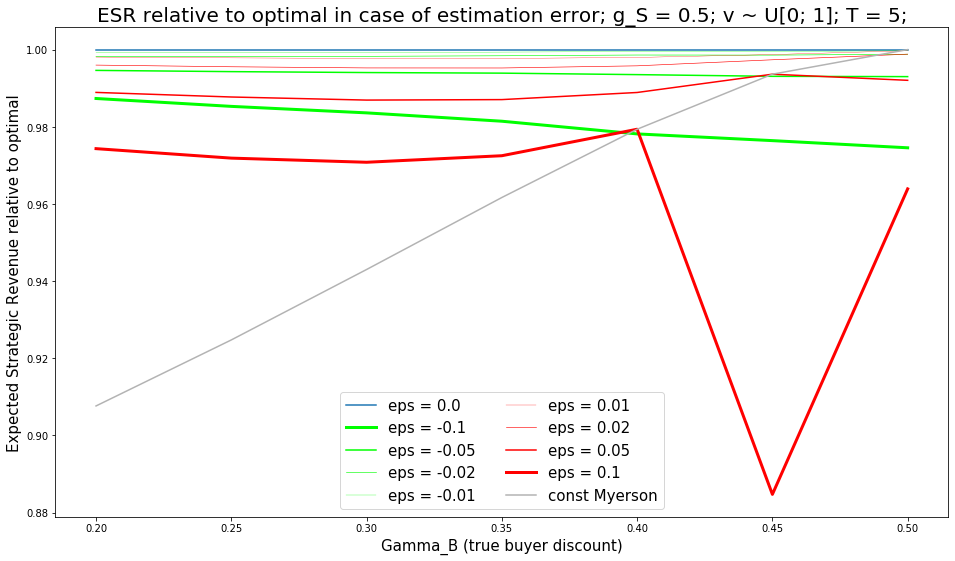

In [33]:
PlotUncertainty(0.5, [-0.1, -0.05, -0.02, -0.01, 0.01, 0.02, 0.05, 0.10], lambda x : uniform_CDF(x, 0.0, 1.0), lambda x : uniform_PDF(x, 0.0, 1.0), 5)